In [1]:
#Number crunching, data and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

# Numerical integration
import sdeint
from scipy.integrate import solve_ivp

# Beatiful progress bars
from tqdm import tqdm, auto
from tqdm.notebook import tqdm

#load, save and compress data
import bz2
import pickle
import _pickle as cPickle

#other libraries
import pathlib

In [2]:
file = pathlib.Path('trajectories.pbz2')
if file.exists ():
    print('Trajectories already calculated, loading and decompressing data...')
    rs_lam = bz2.BZ2File(file, 'rb')
    rs_lam = cPickle.load(rs_lam)

Trajectories already calculated, loading and decompressing data...


In [3]:
def digitize(trajectory, bins):
    x = trajectory[:,0]
    y = trajectory[:,1]
    counts, xedges, yedges = np.histogram2d(x, y, bins = bins)
    return counts/len(x)

def error(target_counts, noise_counts):
    return np.sqrt(sum(sum((target_counts - noise_counts)**2)))

bins = np.linspace(-1.1,1.1,101)

In [4]:
theta = np.linspace(0, 2*np.pi, 5001)
x_target = 1.0*np.cos(theta)
y_target = 1.0*np.sin(theta)
target_trajectory = np.hstack((x_target.reshape(x_target.size,1), y_target.reshape(y_target.size,1)))

In [5]:
target_digitized = digitize(target_trajectory, bins)

In [6]:
def error_traj(target_digitized, trajectories):
    error_vals = []
    for t in trajectories:
        tt = np.hstack((t[:,0].reshape(t[:,0].size,1), t[:,1].reshape(t[:,1].size,1)))
        error_vals.append(error(target_digitized, digitize(tt, bins)))
    return np.array(error_vals)

In [7]:
error_dict = {}
for rs in tqdm(rs_lam.keys()):
    error_dict[rs] = error_traj(target_digitized, rs_lam[rs])

In [84]:
lam_list = []
noise_list = []
error_list = []

for rs in error_dict.keys():
    error_list = error_list + list(error_dict[rs])
    lam_list = lam_list + len(error_dict[rs])*[rs[0]]
    noise_list = noise_list + len(error_dict[rs])*[rs[1]]

In [85]:
df = pd.DataFrame({'lambdas': lam_list, 'noise': noise_list, 'error': error_list})

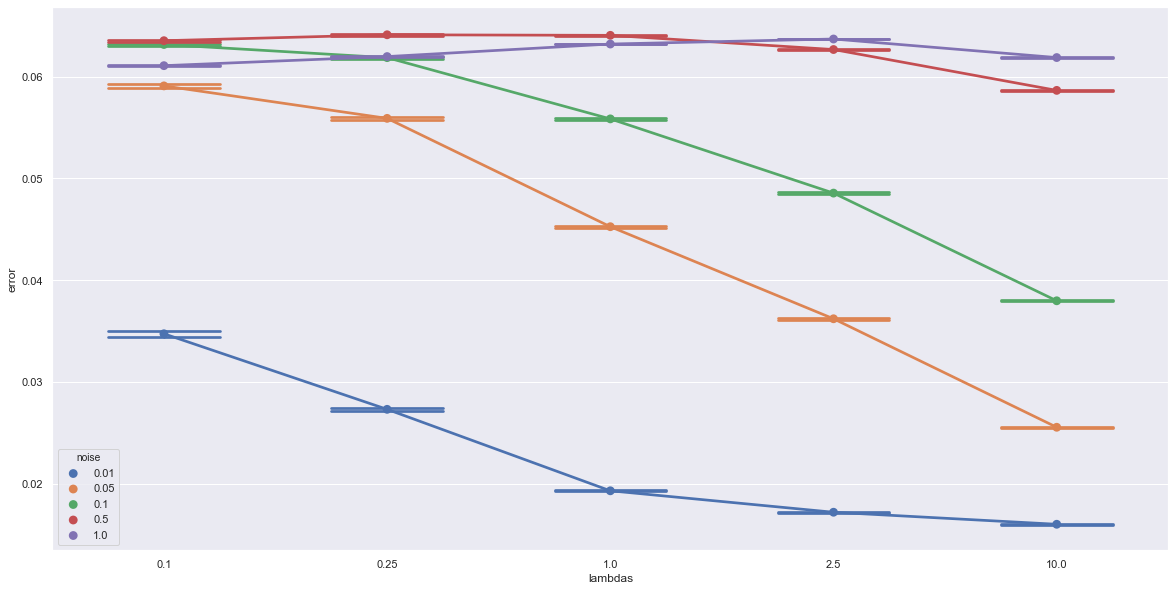

In [86]:
plt.figure(figsize = (20,10))
sns.pointplot(x = 'lambdas', y = 'error', data= df, hue = 'noise', ci = 95, capsize = 0.5)
plt.show()

In [36]:
traj_list = np.empty((125000,1001))

k = 0
for rs in rs_lam.keys():
    for i in range(5000):
        traj_list[k,:] = rs_lam[rs][i][:,0]
        k += 1
    print(rs)

(0.1, 0.01)
(0.1, 0.05)
(0.1, 0.1)
(0.1, 0.5)
(0.1, 1)
(0.25, 0.01)
(0.25, 0.05)
(0.25, 0.1)
(0.25, 0.5)
(0.25, 1)
(1, 0.01)
(1, 0.05)
(1, 0.1)
(1, 0.5)
(1, 1)
(2.5, 0.01)
(2.5, 0.05)
(2.5, 0.1)
(2.5, 0.5)
(2.5, 1)
(10, 0.01)
(10, 0.05)
(10, 0.1)
(10, 0.5)
(10, 1)


In [89]:
df['mean_val'] = np.mean(traj_list, axis = 1)

In [90]:
df['std_val'] = np.std(traj_list, axis = 1)

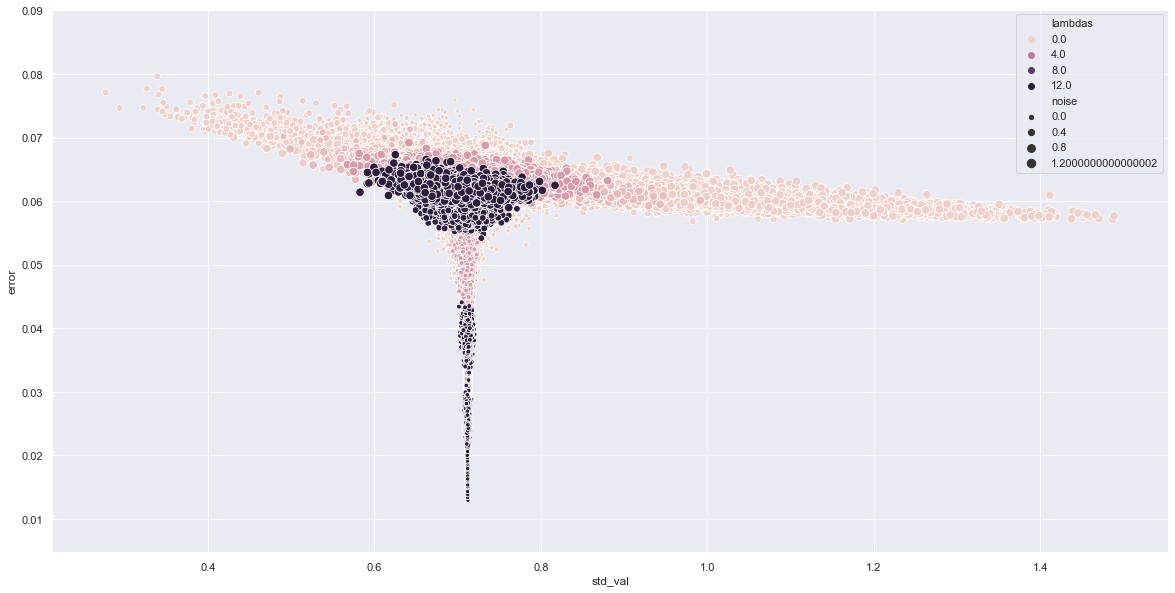

In [94]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'std_val', y = 'error', data = df, hue = 'lambdas', size = 'noise')
plt.show()

In [104]:
df['lambda_sigma'] = 'l: ' + df['lambdas'].astype('str') + ', s: ' +  df['noise'].astype('str')

In [106]:
df['lambda_sigma'] = df['lambda_sigma'].astype('category')

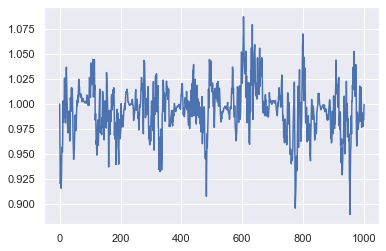

In [113]:
plt.plot(np.sum(rs_lam[(1, 0.1)][0]**2, axis= 1))

In [114]:
mean_r_list = np.empty((125000,1))
std_r_list = np.empty((125000,1))

k = 0
for rs in rs_lam.keys():
    for i in range(5000):
        tmp = np.sum(rs_lam[rs][i]**2, axis = 1)
        mean_r_list[k,:] = np.mean(tmp)
        std_r_list[k,:] = np.std(tmp)
        k += 1
    print(rs)

(0.1, 0.01)
(0.1, 0.05)
(0.1, 0.1)
(0.1, 0.5)
(0.1, 1)
(0.25, 0.01)
(0.25, 0.05)
(0.25, 0.1)
(0.25, 0.5)
(0.25, 1)
(1, 0.01)
(1, 0.05)
(1, 0.1)
(1, 0.5)
(1, 1)
(2.5, 0.01)
(2.5, 0.05)
(2.5, 0.1)
(2.5, 0.5)
(2.5, 1)
(10, 0.01)
(10, 0.05)
(10, 0.1)
(10, 0.5)
(10, 1)


In [115]:
df['mean_r'] = mean_r_list
df['std_r'] = std_r_list

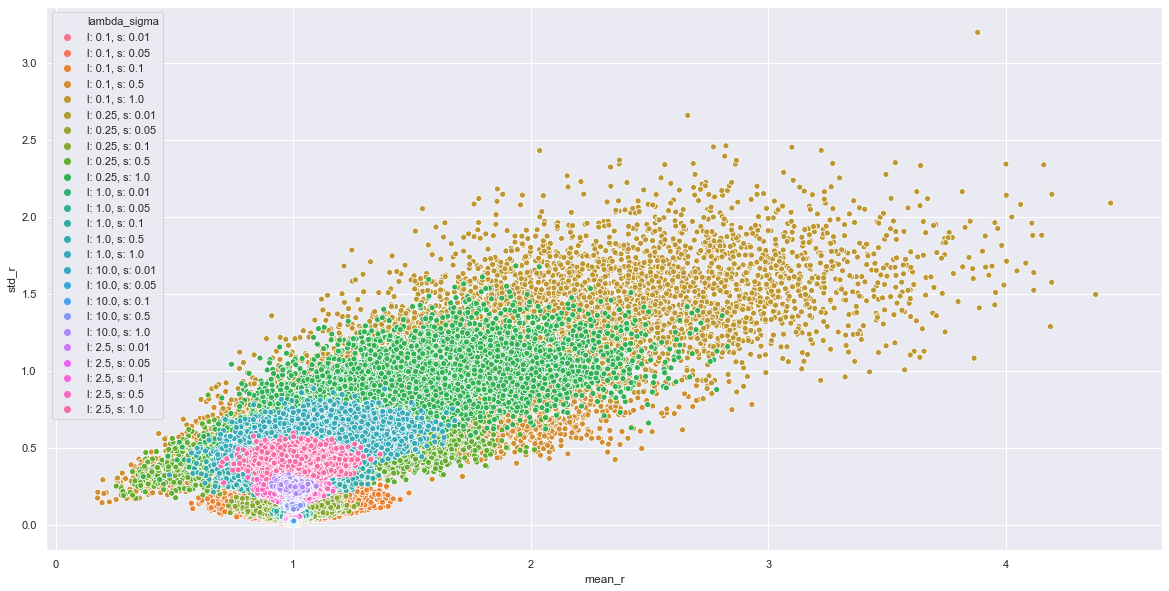

In [174]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'mean_r', y = 'std_r', data = df, hue = 'lambda_sigma')

In [ ]:
sns.catplot(x = 'lambdas',  y = 'error', data = df, hue = 'noise', alpha = 0.3)

In [194]:
sns.catplot?